In [38]:
# Using python 2
%matplotlib inline
import random
#from udacityplots import *
import warnings
warnings.filterwarnings("ignore")

import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

import base64
import json
import subprocess

from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

import matplotlib.image as mpimg

from sklearn.metrics import accuracy_score

#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

In [2]:
def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

In [3]:
def prettyPicture(clf, X_test, y_test, image_name='test.png'):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")
    plt.savefig(image_name)
    


def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print image_start+json.dumps(data)+image_end

In [45]:
def NBclassify(features_train, labels_train):
    
    ### create classifier
    gnb = GaussianNB()
    ### fit the classifier on the training features and labels
    gnb.fit(features_train, labels_train)
    ### return the fit classifier
    return gnb
    

def SVMclassify(features_train, labels_train, kernel="linear", gamma='auto', C=1.0):
    
    ### create classifier
    clf = svm.SVC(C=C, kernel=kernel, gamma=gamma)
    ### fit the classifier on the training features and labels
    clf.fit(features_train, labels_train)
    ### return the fit classifier
    return clf
    ### your code goes here!
    
def DTclassify(features_train, labels_train, min_samples_split=2):
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
    clf.fit(features_train, labels_train)
    return clf

In [5]:
features_train, labels_train, features_test, labels_test = makeTerrainData()
print 'features_train', np.array(features_train).shape
print 'labels_train', np.array(labels_train).shape
print 'features_test', np.array(features_test).shape
print 'labels_test', np.array(labels_test).shape
print 'Sample Training Data: ', features_train[0], 'Label: ', labels_train[0]
print 'Labels: ', np.unique(labels_train)

features_train (750L, 2L)
labels_train (750L,)
features_test (250L, 2L)
labels_test (250L,)
Sample Training Data:  [0.6394267984578837, 0.09935462460613032] Label:  0.0
Labels:  [0. 1.]


BEGIN_IMAGE_f9825uweof8jw9fj4r8{"bytes": "iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAADVKCZpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJztvXt4VNW9//8aSEDwEkDARwgYaCwV\nQoBCRGtVPPQn4JF4qRfwUhUBrWjR9le1VDnRo2hrlVIptVCrUktoSz1CqtAqVm17rBAFMXJaog2E\npJWLVESQSyb7+8dkQmZm75k9s9e+rD2f1/PwhNmzs/eatSfrvT6X9VkRwzAMBEEQBEEzOvndAEEQ\nBEHIBREwQRAEQUtEwARBEAQtEQETBEEQtEQETBAEQdASETBBEARBS0TABEEQBC0RARMEQRC0RARM\nEARB0BIRMEEQBEFLRMAEQRAELREBEwRBELREBEwQBEHQEhEwQRAEQUtEwARBEAQtEQETBEEQtEQE\nTBAEQdASETBBEARBS0TABEEQBC0RARMEQRC0RARMEARB0BIRMEEQBEFLRMAEQRAELREBEwRBELRE\nBEwQBEHQEhEwQRAEQUtEwARBEAQtEQETBEEQtEQETBAEQdASETBBEARBS0TABEEQBC0RARMEQRC0\nRARMEARB0BIRMEEQBEFLCvxugFt0j0To4XcjBEFIoV+a9/4NfGbzOt2AHkCkwzED+DiLa2RLLvf0\no50dOQnonOGcKLCj7f+HTzyR3bt3u9soRYRWwHoAN/ndCEEQUpgNlpPLw0ANUOfgOh8DC3Jrmmv3\nLAPGA0XAXmAt9j6jCsqAyUAXi/cN4LkO7akpKfGgVWoIrYAJ2ePnH5mQP6zFekDtQuw7aOd7V5Tl\ncRXkes86/Ptbit/3YswtsQ

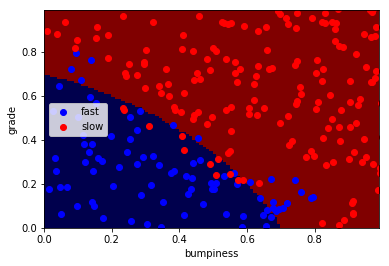

In [6]:
### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


# You will need to complete this function imported from the ClassifyNB script.
# Be sure to change to that code tab to complete this quiz.
clf = NBclassify(features_train, labels_train)



### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test, "test_nb.png")
output_image("test_nb.png", "png", open("test_nb.png", "rb").read())


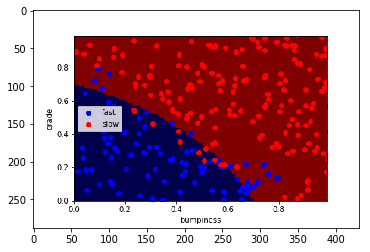

In [7]:
img=mpimg.imread("test.png")
plt.imshow(img)
plt.show()

Model Accuracy on test data

In [8]:
pred = clf.predict(features_test)
print "Model Acuracy: ", accuracy_score(pred, labels_test)

Model Acuracy:  0.884


## SVM

BEGIN_IMAGE_f9825uweof8jw9fj4r8{"bytes": "iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAADVKCZpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJztnXt4VNW99z8DCTeVAAI+QsBA04NC\nQChEsFaFg69cXonWegHvRUCP6KGevl5KlRM9irbWW6UcClqVYw1tqUegSlrBKm2PFVKhGDmWaMGQ\ntHKRighySbLfPyaTZCZ7z+yZvfbea838Ps/DE2ZnZ+81a8+s7/pd1m9FLMuyEARBEATD6BB2AwRB\nEAQhE0TABEEQBCMRARMEQRCMRARMEARBMBIRMEEQBMFIRMAEQRAEIxEBEwRBEIxEBEwQBEEwEhEw\nQRAEwUhEwARBEAQjEQETBEEQjEQETBAEQTASETBBEATBSETABEEQBCMRARMEQRCMRARMEARBMBIR\nMEEQBMFIRMAEQRAEIxEBEwRBEIxEBEwQBEEwEhEwQRAEwUhEwARBEAQjEQETBEEQjEQETBAEQTAS\nETBBEATBSETABEEQBCMRARMEQRCMRARMEARBMBIRMEEQBMFIRMAEQRAEIxEBEwRBEIxEBEwQBEEw\nEhEwQRAEwUhEwARBEAQjyQu7AX7RLRKhR9iNEAShHf2S/O4fwBcur9MV6AFE2hyzgE/TuEa6ZHLP\nMNrZllOAjinOaQR2N///2Mkns2/fPn8bpYisFbAewE1hN0IQhHbMA8fJ5TFgDVDt4TqfAk9m1jTf\n7lkCTAQKgAPAety9RxWUANOATg6/t4CX2rRnTVFRAK1SQ9YKmJA+YX7JhNxhPc4Daiein0E3n7uC\nNI+rINN7VhPedyl230uwt8

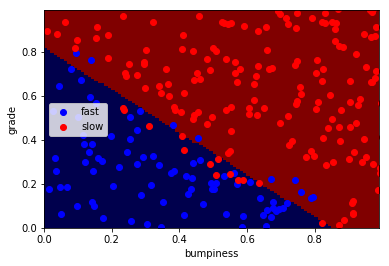

In [9]:
clf = SVMclassify(features_train, labels_train)



### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test, "test_svm.png")
output_image("test_svm.png", "png", open("test_svm.png", "rb").read())

In [10]:
pred = clf.predict(features_test)
print "Model Acuracy: ", accuracy_score(pred, labels_test)

Model Acuracy:  0.92


### Comparing SVM and NB

Text(0.5,1,'SVM Model')

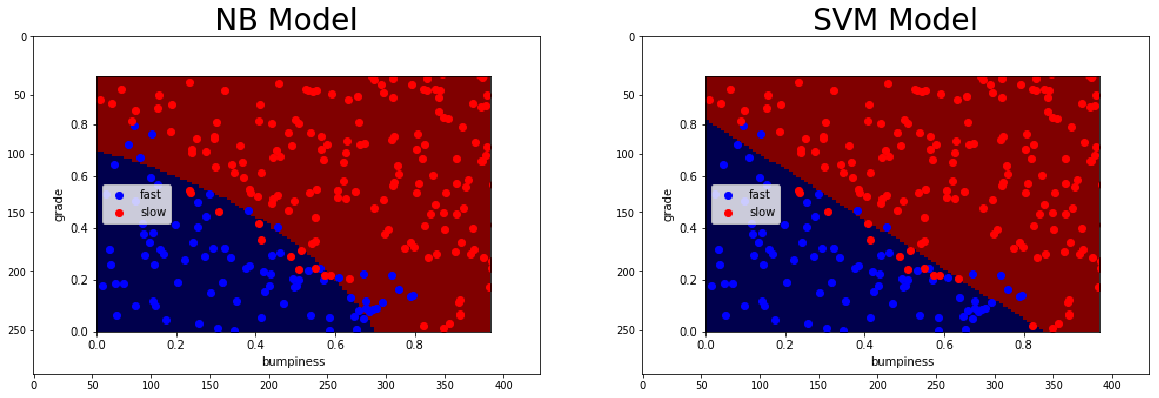

In [11]:
# Visualize model comparision
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('NB Model', fontsize=30)
img2 = mpimg.imread("test_SVM.png")
ax2.imshow(img2)
ax2.set_title('SVM Model', fontsize=30)

### Picking a different SVM kernel

BEGIN_IMAGE_f9825uweof8jw9fj4r8{"bytes": "iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAADVKCZpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJztvXt4VNW9//8aSLipBBDwEQJGmhaF\ngNAQwVoVDv0JeCReigoqahHQI3qo7a/YUuVEj6Kn1guVcizUqtQa2lKPQJG0glXbHiukQiFyLNEG\nQtLKRSoiyCWT/f1jMiEz2Xtm79m3tWY+r+fhCbOzs/eatWfWe30u67MihmEYCIIgCIJmdAi7AYIg\nCIKQCSJggiAIgpaIgAmCIAhaIgImCIIgaIkImCAIgqAlImCCIAiCloiACYIgCFoiAiYIgiBoiQiY\nIAiCoCUiYIIgCIKWiIAJgiAIWiICJgiCIGiJCJggCIKgJSJggiAIgpaIgAmCIAhaIgImCIIgaIkI\nmCAIgqAlImCCIAiCloiACYIgCFoiAiYIgiBoiQiYIAiCoCUiYIIgCIKWiIAJgiAIWiICJgiCIGiJ\nCJggCIKgJSJggiAIgpaIgAmCIAhaIgImCIIgaIkImCAIgqAlImCCIAiCloiACYIgCFoiAiYIgiBo\niQiYIAiCoCUiYIIgCIKW5IXdAL/oFonQI+xGCILQjn4pfvdP4DOb1+kK9AAibY4ZwMcOruGUTO4Z\nRjvbcgbQMc05UWBPy/+Pn346+/fv97dRHpG1AtYDuC3sRgiC0I65YDm5PA6sAWpcXOdjYFFmTfPt\nniXAeKAAOAhswN579IISYDLQyeL3BvBSm/asKSoKoFXekLUCJjgnzC+ZkDtswHpA7UTsM2jnc1fg\n8LgXZHrPGsL7LsXveyXmlt

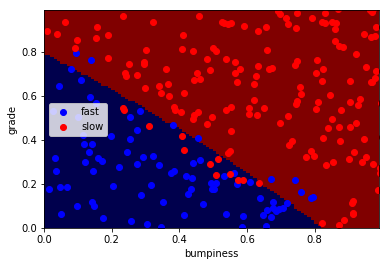

In [15]:
clf = SVMclassify(features_train, labels_train, "rbf")



### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test, "test_svm_rbf.png")
output_image("test_svm_rbf.png", "png", open("test_svm_rbf.png", "rb").read())

Text(0.5,1,'SVM RBF Model')

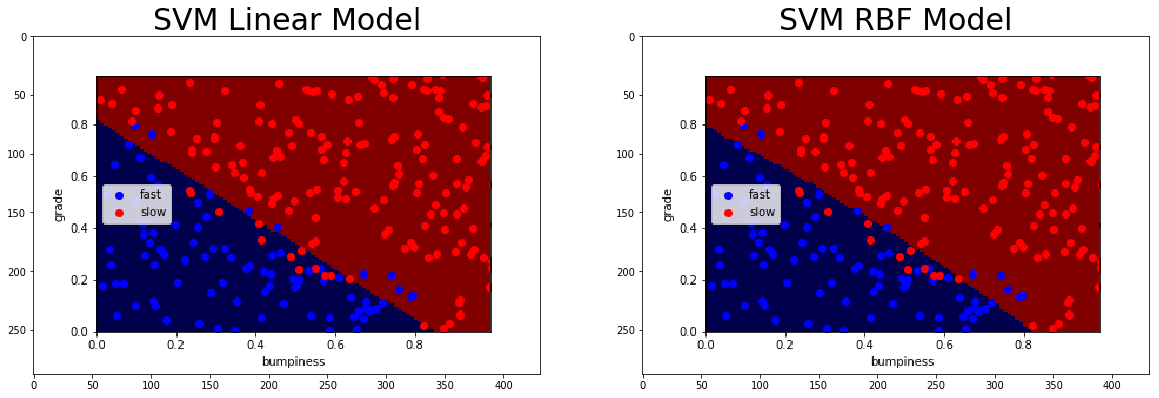

In [17]:
# Visualize model comparision
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img2)
ax1.set_title('SVM Linear Model', fontsize=30)
img3 = mpimg.imread("test_SVM_rbf.png")
ax2.imshow(img3)
ax2.set_title('SVM RBF Model', fontsize=30)

### Parameters for Machine Learning

- Kernel
- C
- gamma

Varying <strong>gamma</strong> parameter with RBF kernel

BEGIN_IMAGE_f9825uweof8jw9fj4r8{"bytes": "iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAADVKCZpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJztnXt8VNW5978DCYioAQT8CAEiTY8K\nAaEQwVoRD33l8mq0Hi/gvYhoRQ/19PVSqjR6FHtqvVVKLXgrhxpsLUfkKGmFVm17rJAKReRYoo2G\npJWLVETumez3j8kkM5O9Z/bs61p7nu/nwyfMnp29n1l7sn7redaznhUzDMNAEARBEDSjS9gGCIIg\nCIITRMAEQRAELREBEwRBELREBEwQBEHQEhEwQRAEQUtEwARBEAQtEQETBEEQtEQETBAEQdASETBB\nEARBS0TABEEQBC0RARMEQRC0RARMEARB0BIRMEEQBEFLRMAEQRAELREBEwRBELREBEwQBEHQEhEw\nQRAEQUtEwARBEAQtEQETBEEQtEQETBAEQdASETBBEARBS0TABEEQBC0RARMEQRC0RARMEARB0BIR\nMEEQBEFLRMAEQRAELREBEwRBELREBEwQBEHQEhEwQRAEQUtEwARBEAQtEQETBEEQtEQETBAEQdAS\nETBBEARBS0TABEEQBC0pCtsAvzg6FqNX2EYIgtCJAVne+wdwwOZ1egC9gFjKMQP4NI9r5IuTe4Zh\nZyonAF1znBMHtrf9//Dxx7Nr1y5/jfKIyApYL+CGsI0QBKETc8FycHkYWAVsdnGdT4HHnJnm2z0r\ngElACbAHWIu9z+gFFcD5QDeL9w1gRYo9q8rKArDKGyIrYEL+hPlHJhQOa7HuULuR+A7a+d6V5Hnc\nC5zeczPh/S0l73sh5p7Yfv

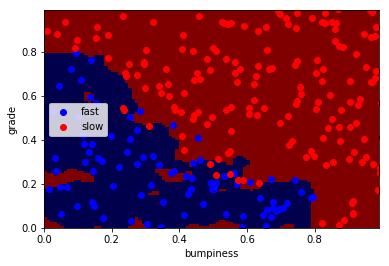

In [21]:
clf = SVMclassify(features_train, labels_train, "rbf", 1000)



### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test, "test_svm_rbf_1000.png")
output_image("test_svm_rbf_1000.png", "png", open("test_svm_rbf_1000.png", "rb").read())

Text(0.5,1,'SVM RBF Model Gamma 1000')

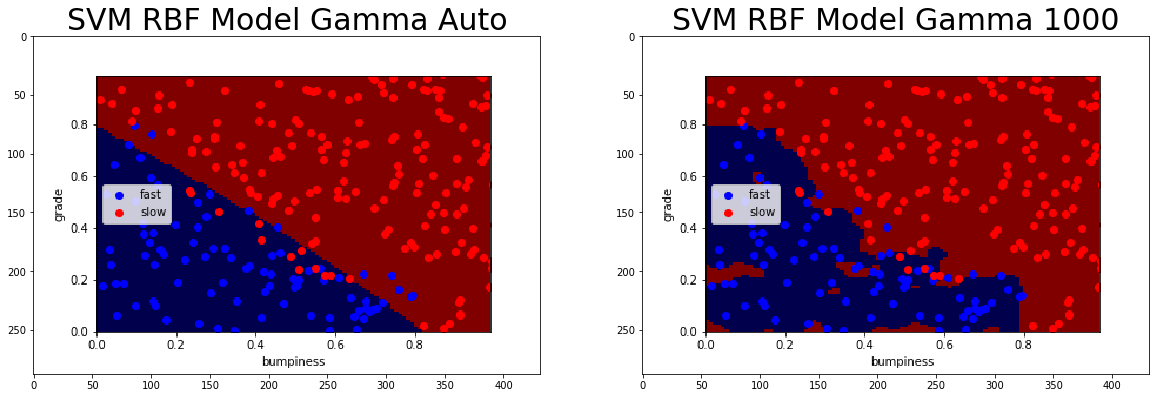

In [23]:
# Visualize model comparision
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img3)
ax1.set_title('SVM RBF Model Gamma Auto', fontsize=30)
img4 = mpimg.imread("test_SVM_rbf_1000.png")
ax2.imshow(img4)
ax2.set_title('SVM RBF Model Gamma 1000', fontsize=30)

Varying SVM <strong>C - parameter</strong> for 

- Kernel: rbf
- gamma: 1000
- C - 0.5 - 1.0

BEGIN_IMAGE_f9825uweof8jw9fj4r8{"bytes": "iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAADVKCZpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJztvX2cFNWV//9umAERdQABX8IAAyGr\nwoAQGMEYEZf8BFwdjYsKPkcRXdElJD8fQiI7uorZGJ8iIQZ8ZI2DCXFFokwiJGqSNcIoBEfWMBp0\nmInyIHFEkIfpqe8fPT3T3VPVXd11q+re7vN+vXgNXV1ddfp29/3cc+6550Ysy7IQBEEQBMPoErYB\ngiAIgpALImCCIAiCkYiACYIgCEYiAiYIgiAYiQiYIAiCYCQiYIIgCIKRiIAJgiAIRiICJgiCIBiJ\nCJggCIJgJCJggiAIgpGIgAmCIAhGIgImCIIgGIkImCAIgmAkImCCIAiCkYiACYIgCEYiAiYIgiAY\niQiYIAiCYCQiYIIgCIKRiIAJgiAIRiICJgiCIBiJCJggCIJgJCJggiAIgpGIgAmCIAhGIgImCIIg\nGIkImCAIgmAkImCCIAiCkYiACYIgCEYiAiYIgiAYiQiYIAiCYCQiYIIgCIKRiIAJgiAIRiICJgiC\nIBiJCJggCIJgJCJggiAIgpEUhW2AXxwZidArbCMEQejEgDTP/QP4wuV1egC9gEjCMQv4NItrZEsu\n9wzDzkSOA7pmOCcK7Gj7/6Fjj2X37t3+GqWIvBWwXsB1YRshCEIn5oHj4PIQsBqo83CdT4GHcjPN\nt3uWA1OAEqAZWIe796iCcuBcoJvD8xbwXII9q8vKArBKDXkrYEL2hPkjEwqHdTh3qN2IfQfdfO9K\nsjyuglzvWUd4v6X4fc/H3h

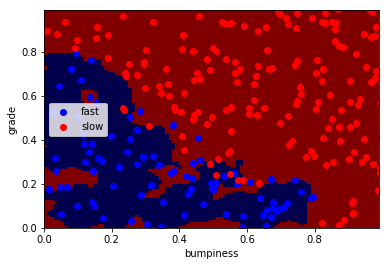

In [35]:
clf = SVMclassify(features_train, labels_train, "rbf", 1000, 0.5)



### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test, "test_svm_rbf_g1000_c0-5.png")
output_image("test_svm_rbf_g1000_c0-5.png", "png", open("test_svm_rbf_g1000_c0-5.png", "rb").read())

Text(0.5,1,'SVM RBF Model Gamma 1000 C 0.5')

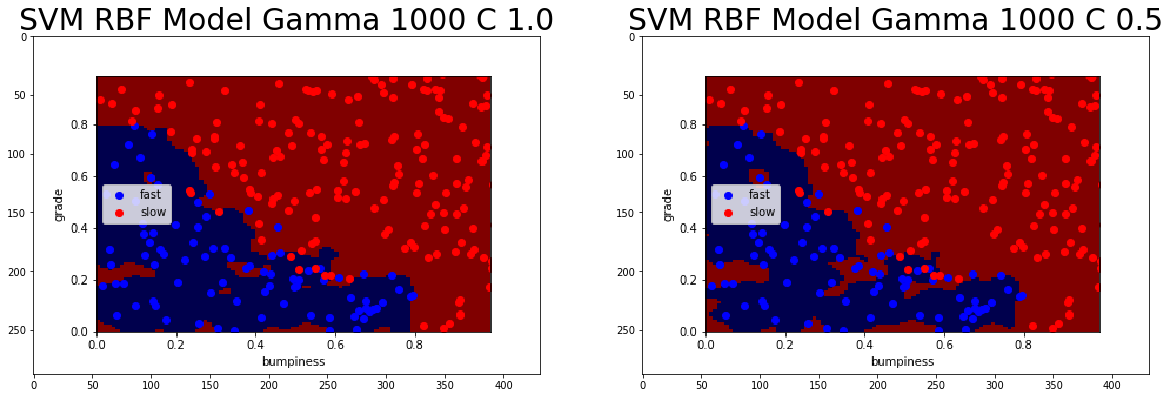

In [37]:
# Visualize model comparision
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img4)
ax1.set_title('SVM RBF Model Gamma 1000 C 1.0', fontsize=30)
img5 = mpimg.imread("test_svm_rbf_g1000_c0-5.png")
ax2.imshow(img5)
ax2.set_title('SVM RBF Model Gamma 1000 C 0.5', fontsize=30)

### SVM Effects of High Gamma Value
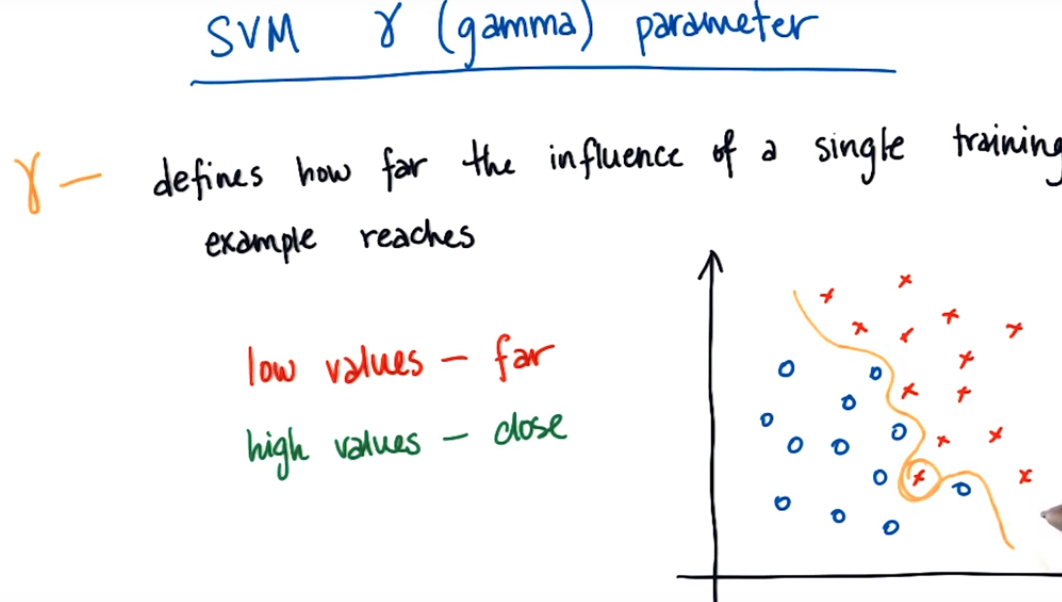

# Decision Tree Classifier 

BEGIN_IMAGE_f9825uweof8jw9fj4r8{"bytes": "iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAADVKCZpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJztvXt8VNW5//8eSLgqAQR8CQEDTQ8W\nAkIhgrVSPfQn4NFYPajgvQjYih7r6c8brTR6LFhbb5VyLHgrxxraUo/AQWKFVml7qBCFYuRYog2G\npJWL1IDcM9nfPyaTZCZ7z+yZfVtrz/N+vXiF2dmz9zNrT9ZnPc961rMihmEYCIIgCIJmdAraAEEQ\nBEHIBhEwQRAEQUtEwARBEAQtEQETBEEQtEQETBAEQdASETBBEARBS0TABEEQBC0RARMEQRC0RARM\nEARB0BIRMEEQBEFLRMAEQRAELREBEwRBELREBEwQBEHQEhEwQRAEQUtEwARBEAQtEQETBEEQtEQE\nTBAEQdASETBBEARBS0TABEEQBC0RARMEQRC0RARMEARB0BIRMEEQBEFLRMAEQRAELREBEwRBELRE\nBEwQBEHQEhEwQRAEQUtEwARBEAQtEQETBEEQtEQETBAEQdASETBBEARBS0TABEEQBC0RARMEQRC0\nRARMEARB0BIRMEEQBEFL8oI2wCt6RCL0DtoIQRA6MDDF7/4BHLV5ne5AbyDS7pgBfJrBNTIlm3sG\nYWd7Tgc6pzknCuxp+f+J005j//793hrlEqEVsN7ALUEbIQhCB+4Ay8HlCWANUO3gOp8CT2Znmmf3\nLAEmAwVAI7ABe5/RDUqAS4EuFr83gJfb2bOmqMgHq9whtAImZE6Qf2RC7rAB6w61C7HvoJ3vXUGG\nx90g23tWE9zfUvy+X8PcEz

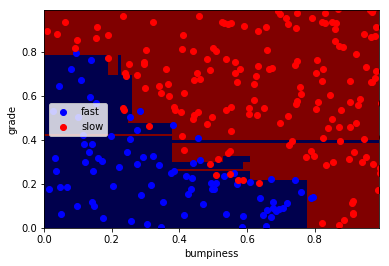

In [41]:
clf = DTclassify(features_train, labels_train)



### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test, "test_DT.png")
output_image("test_DT.png", "png", open("test_DT.png", "rb").read())

Text(0.5,1,'Decision Tree Classifer')

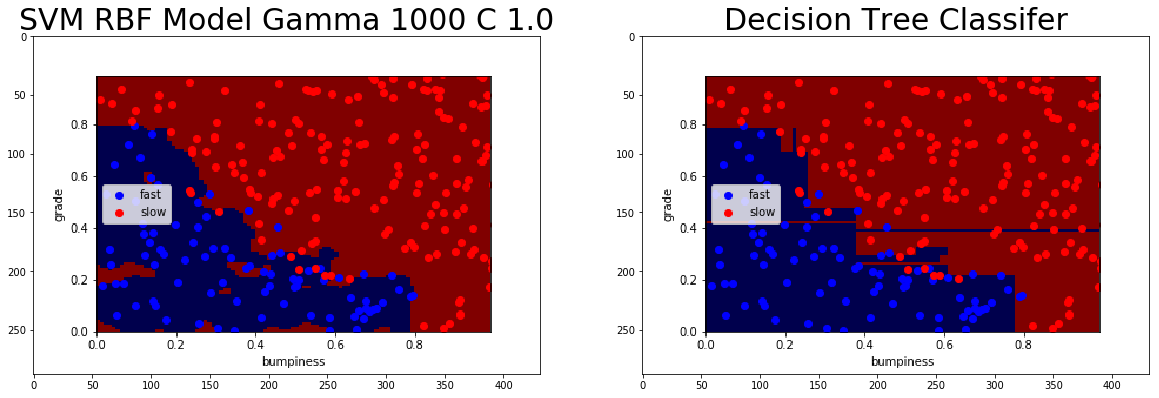

In [42]:
# Visualize model comparision
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img4)
ax1.set_title('SVM RBF Model Gamma 1000 C 1.0', fontsize=30)
img6 = mpimg.imread("test_DT.png")
ax2.imshow(img6)
ax2.set_title('Decision Tree Classifer', fontsize=30)

In [43]:
pred = clf.predict(features_test)
print "Model Acuracy: ", accuracy_score(pred, labels_test)

Model Acuracy:  0.912


BEGIN_IMAGE_f9825uweof8jw9fj4r8{"bytes": "iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAADVKCZpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJztvXt8VNW5//8eSLgqAQR8CQEDTQ+W\nm1ASwVoRDucll6/G1oqC9yJgC3qopz8vpZVGj0WrVWulHApalVpDW2uFHCWtYpW2xwqpUIgcS7Rg\nSE7lIhUxXDPZvz8mk2Qme8/smX1ba8/zfr14hdnZs/cza0/WZz3PetazIoZhGAiCIAiCZnQK2gBB\nEARByAYRMEEQBEFLRMAEQRAELREBEwRBELREBEwQBEHQEhEwQRAEQUtEwARBEAQtEQETBEEQtEQE\nTBAEQdASETBBEARBS0TABEEQBC0RARMEQRC0RARMEARB0BIRMEEQBEFLRMAEQRAELREBEwRBELRE\nBEwQBEHQEhEwQRAEQUtEwARBEAQtEQETBEEQtEQETBAEQdASETBBEARBS0TABEEQBC0RARMEQRC0\nRARMEARB0BIRMEEQBEFLRMAEQRAELREBEwRBELREBEwQBEHQEhEwQRAEQUtEwARBEAQtEQETBEEQ\ntEQETBAEQdASETBBEARBS/KCNsArekQi9A7aCEEQOjAwxe/+CRyzeZ3uQG8g0u6YAXycwTUyJZt7\nBmFne84EOqc5Jwrsa/n/yTPO4ODBg94a5RKhFbDewM1BGyEIQgcWg+Xg8iRQCdQ4uM7HwGPZmebZ\nPUcBU4EC4DCwEXuf0Q1GAZcCXSx+bwAvtLOnsqjIB6vcIbQCJmROkH9kQu6wEesOtQux76Cd711B\nhsfdINt71hDc31L8vl/C3B

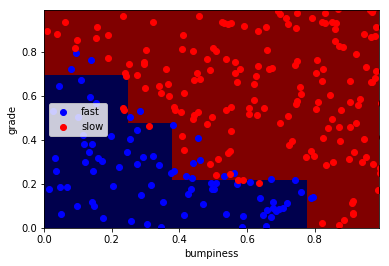

In [46]:
clf = DTclassify(features_train, labels_train, min_samples_split=50)



### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test, "test_DT_split_50.png")
output_image("test_DT_split_50.png", "png", open("test_DT_split_50.png", "rb").read())

In [47]:
pred = clf.predict(features_test)
print "Model Acuracy: ", accuracy_score(pred, labels_test)

Model Acuracy:  0.912


Text(0.5,1,'DT-Classifer, min_split=50')

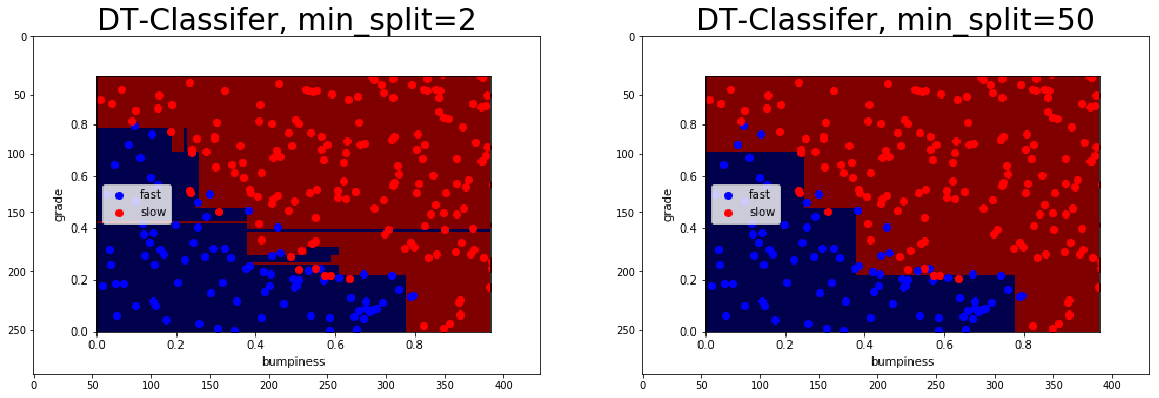

In [49]:
# Visualize model comparision
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img6)
ax1.set_title('DT-Classifer, min_split=2', fontsize=30)
img7 = mpimg.imread("test_DT_split_50.png")
ax2.imshow(img7)
ax2.set_title('DT-Classifer, min_split=50', fontsize=30)